In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Start date
start = '2009-06-10'
## CoinMetrics data
data = pd.read_csv('https://community-api.coinmetrics.io/v2/assets/btc/metricdata.csv?metrics=PriceUSD,CapMrktCurUSD,CapRealUSD,TxTfrValAdjUSD,FeeTotUSD,FeeTotNtv,IssContNtv,BlkCnt,DiffMean,SplyCur,AdrActCnt&start='+start, index_col = 0, parse_dates=True)

In [3]:
data['S2F'] = data['SplyCur'] / data['IssContNtv'].rolling(360).sum()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


S2F Price = 3.24 * log(S2F) -1.65
r2 = 0.94


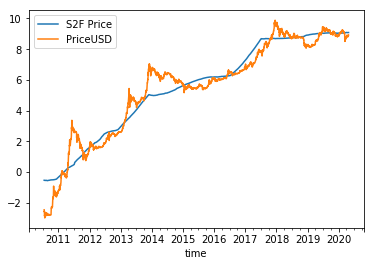

In [33]:
w_data = data[['S2F', 'PriceUSD']]
w_data.dropna(thresh = 2, inplace=True)

log_s2f = np.log(w_data['S2F']).values.reshape(-1, 1)
log_price = np.log(w_data['PriceUSD']).values.reshape(-1, 1)

reg = LinearRegression().fit(log_s2f, log_price)

a = reg.coef_[0][0]
b = reg.intercept_[0]

data['S2F Price'] = np.exp(np.log(w_data['S2F']) * a + b)

r2 = reg.score(log_s2f, log_price)

print('S2F Price = '+str(a.round(2))+' * log(S2F) '+str(b.round(2)))
print('r2 = '+str(r2.round(2)))
np.log(data[['S2F Price', 'PriceUSD']]).plot()

file = data[['S2F Price', 'PriceUSD']].to_csv